In [1]:
from spherinator.data import ParquetDataModule

datamodule = ParquetDataModule(
    "/home/doserbd/data/gaia/xp_sampled_mean_spectrum/parquet",
    data_column="flux",
    batch_size=10,
    num_workers=1,
    shuffle=False,
)
datamodule.setup("fit")

batch = next(iter(datamodule.train_dataloader()))
batch.shape

torch.Size([10, 1, 344])

In [2]:
import wandb
run = wandb.init()
artifact = run.use_artifact('ain-space/gaia/model-g8j8dna6:v0', type='model')
artifact_dir = artifact.download()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: bernddoser. Use `wandb login --relogin` to force relogin


wandb:   1 of 1 files downloaded.  


In [9]:
import torch
from spherinator.models import (
    ConvolutionalDecoder1D,
    ConvolutionalEncoder1D,
    Autoencoder,
)

encoder = ConvolutionalEncoder1D(input_dim=344, output_dim=256)
decoder = ConvolutionalDecoder1D(input_dim=256, output_dim=344)
model = Autoencoder(encoder=encoder, decoder=decoder, h_dim=256, z_dim=10)
model

ckpt = "/home/doserbd/git/Spherinator-main/gaia/artifacts/model-g8j8dna6:v0/model.ckpt"
checkpoint = torch.load(ckpt, weights_only=True, map_location="cpu")
model.load_state_dict(checkpoint["state_dict"])
model.eval()

recon = model(batch)

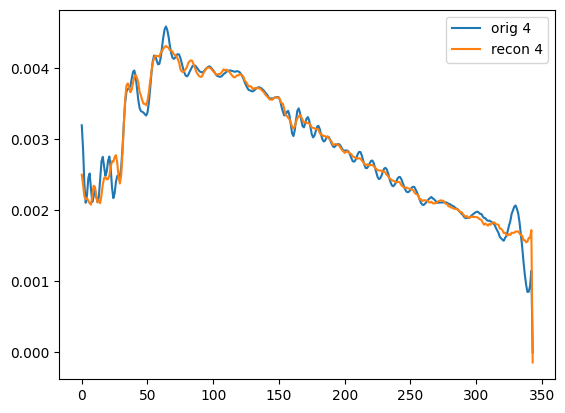

In [14]:
from matplotlib import pyplot as plt

id = 4
plt.figure()
plt.plot(batch[id][0].cpu().detach().numpy(), label=f"orig {id}")
plt.plot(recon[id][0].cpu().detach().numpy(), label=f"recon {id}")
plt.legend(loc="upper right")
plt.show()